#Predicting sentiment from product reviews: Comparison of Two Models
##by Jekaterina Novikova

In [7]:
import graphlab

#Upload Product Review Data

Loading reviews for a set of baby products from Amazon. 

In [9]:
products = graphlab.SFrame('J:/ML self projects/ML Foundations Coursera/week 3/amazon_baby.gl/')

#Exploring the Data

Data includes the product name, the review text and the rating of the review. 

In [10]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


#Build the Word Count Vector for Each Review

In [11]:
products['word_count'] = graphlab.text_analytics.count_words(products['review'])

In [12]:
products.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5L, 'stink': 1L,'because': 1L, 'order ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3L, 'love': 1L,'it': 2L, 'highly': 1L, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2L, 'quilt': 1L,'it': 1L, 'comfortable': ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1L, 'and':3L, 'love': 2L, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2L, 'parents!!':1L, 'all': 2L, 'puppe ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2L, 'cute': 1L,'help': 2L, 'doll': 1L, ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1L, 'be': 1L,'is': 1L, 'it': 1L, ' ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'feeding,': 1L, 'and':2L, 'all': 1L, 'right': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1L, 'help': 1L,'give': 1L, 'is': 1L, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1L, 'all':1L, 'standarad': 1L, ..."


In [13]:
graphlab.canvas.set_target('ipynb')

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import normal
products['name'].show()

#Examining the Reviews for the Most-sold Product:  
##'Vulli Sophie the Giraffe Teether'

In [15]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [16]:
len(giraffe_reviews)

785

In [17]:
giraffe_reviews['rating'].show(view='Categorical')

#Build a Sentiment Classifier

In [18]:
products['rating'].show(view='Categorical')

##Define What's a Positive and a Negative Sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [19]:
#ignore all 3* reviews
products = products[products['rating'] != 3]

In [20]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [21]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3L, 'love': 1L,'it': 2L, 'highly': 1L, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2L, 'quilt': 1L,'it': 1L, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1L, 'and':3L, 'love': 2L, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2L, 'parents!!':1L, 'all': 2L, 'puppe ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2L, 'cute': 1L,'help': 2L, 'doll': 1L, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1L, 'be': 1L,'is': 1L, 'it': 1L, ' ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'feeding,': 1L, 'and':2L, 'all': 1L, 'right': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1L, 'help': 1L,'give': 1L, 'is': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1L, 'all':1L, 'standarad': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 1L, 'forget': 1L,'just': 1L, ""daughter ...",1


##Train the Sentiment Classifier

In [22]:
train_data,test_data = products.random_split(.8, seed=0)

In [23]:
sentiment_model = graphlab.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=['word_count'],
                                                     validation_set=test_data)

PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 133448
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 1
PROGRESS: Number of unpacked features : 219217
PROGRESS: Number of coefficients    : 219218
PROGRESS: Starting L-BFGS
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+-----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+----------+-----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 5        | 0.000002  | 5.191098     | 0.841481          | 0.839989            |
PROGRESS: | 2         | 9        | 3.000000  | 7.447502     | 0.947425          | 0.894877            |
PROGRESS: | 3         | 10       | 3.000000  | 8.227504     | 0.92

#Evaluate the Sentiment Model

In [24]:
sentiment_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +------------------+----------------+-----------------+-------+------+
 |    threshold     |      fpr       |       tpr       |   p   |  n   |
 +------------------+----------------+-----------------+-------+------+
 |       0.0        | 0.224474474474 | 0.0036102373463 | 27976 | 5328 |
 | 0.0010000000475  | 0.775525525526 |  0.996389762654 | 27976 | 5328 |
 | 0.00200000009499 | 0.735548048048 |  0.995353159851 | 27976 | 5328 |
 | 0.00300000002608 | 0.712837837838 |  0.99474549614  | 27976 | 5328 |
 | 0.00400000018999 | 0.69725975976  |  0.994280812125 | 27976 | 5328 |
 | 0.00499999988824 | 0.685998498498 |  0.993923362882 | 27976 | 5328 |
 | 0.00600000005215 | 0.676238738739 |  0.993422933943 | 27976 | 5328 |
 | 0.00700000021607 | 0.665728228228 |  0.993065484701 | 27976 | 5328 |
 | 0.00800000037998 | 0.655405405405 |  0.992815270232 | 27976 | 5328 |
 | 0.00899999961257 | 0.64808558

In [25]:
sentiment_model.show(view='Evaluation')

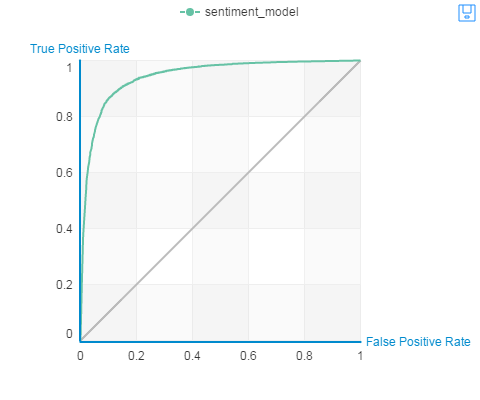

In [61]:
from IPython.display import Image
Image(filename='img1.png')

#Applying the Learned Model to Understand Sentiment for Giraffe

In [28]:
giraffe_reviews.head()

name,review,rating,word_count
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'and': 1L, 'all': 1L,'because': 1L, 'it': 1L, ..."
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'and': 1L, 'right': 1L,'help': 1L, 'just': 1L, ..."
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'and': 2L, 'all': 1L,'latex.': 1L, 'being': ..."
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'and': 2L, 'one!': 1L,'all': 1L, 'love': 1L, ..."
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'and': 3L, 'all': 1L,'old': 1L, 'her.': 1L, ..."
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'and': 6L, 'seven': 1L,'already': 1L, 'love': ..."
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'and': 4L, 'drooling,':1L, 'love': 1L, 'her.': ..."
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'and': 3L, 'chew': 1L,""don't"": 1L, 'is': 1L, ..."
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'chew': 2L, 'because':1L, 'just': 2L, 'what': ..."
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'and': 2L, 'already':1L, 'in': 1L, 'some': ..."


In [30]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type='probability')

##Sort the Reviews Based on the Predicted Sentiment and Explore

In [31]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [32]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'giggles': 1L, 'all':1L, ""violet's"": 2L, ...",1.0
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'peace': 1L, 'month':1L, 'bright': 1L, ...",0.999999999703
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'all': 2L, 'pops': 1L,'existence.': 1L, ...",0.999999999392
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'all': 2L, ""don't"": 1L,'(literally).so': 1L, ...",0.99999999919
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'cute': 1L, 'all': 1L,'reviews.': 2L, 'just': ...",0.999999998657
Vulli Sophie the GiraffeTeether ...,Sophie the Giraffe is theperfect teething toy. ...,5.0,"{'just': 2L, 'both': 1L,'month': 1L, 'ears,': ...",0.999999997108
Vulli Sophie the GiraffeTeether ...,Sophie la giraffe isabsolutely the best toy ...,5.0,"{'and': 5L, 'the': 1L,'all': 1L, 'old': 1L, ...",0.999999995589
Vulli Sophie the GiraffeTeether ...,My 5-mos old son took tothis immediately. The ...,5.0,"{'just': 1L, 'shape': 2L,'mutt': 1L, '""dog': 1L, ...",0.999999995573
Vulli Sophie the GiraffeTeether ...,My nephews and my fourkids all had Sophie in ...,5.0,"{'and': 4L, 'chew': 1L,'all': 1L, 'perfect;': ...",0.999999989527
Vulli Sophie the GiraffeTeether ...,Never thought I'd see myson French kissing a ...,5.0,"{'giggles': 1L, 'all':1L, 'out,': 1L, 'over': ...",0.999999985069


##Most Positive Reviews for the Giraffe

In [33]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [34]:
giraffe_reviews[1]['review']

"I'm not sure why Sophie is such a hit with the little ones, but my 7 month old baby girl is one of her adoring fans.  The rubber is softer and more pleasant to handle, and my daughter has enjoyed chewing on her legs and the nubs on her head even before she started teething.  She also loves the squeak that Sophie makes when you squeeze her.  Not sure what it is but if Sophie is amongst a pile of her other toys, my daughter will more often than not reach for Sophie.  And I have the peace of mind of knowing that only edible and safe paints and materials have been used to make Sophie, as opposed to Bright Starts and other baby toys made in China.  Now that the research is out on phthalates and other toxic substances in baby toys, I think it's more important than ever to find good quality toys that are also safe for our babies to handle and put in their mouths.  Sophie is a must-have for every new mom in my opinion.  Even if your kid is one of the few that can take or leave her, it's worth

##Most Negative Reviews for the Giraffe

In [35]:
giraffe_reviews[-1]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [36]:
giraffe_reviews[-2]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

#Creating Another Model Using Only the selected_words as Features

##Threw away unimportant words and create a list of important words

In [37]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [38]:
def count_selected(word_count):
    n = 0;
    dict = {'awesome':0, 'great':0, 'fantastic':0, 'amazing':0, 'love':0, 'horrible':0, 'bad':0, 'terrible':0, 'awful':0, 'wow':0, 'hate':0};
    for each in selected_words:
        if each in word_count:
            n = n + word_count.get(each);
            dict[each] = n;
        n = 0
    return dict

In [39]:
products['count_selected'] = products['word_count'].apply(count_selected)

In [40]:
def awesome_count(word_count):
    if 'awesome' in word_count:
        return word_count['awesome']
    else:
        return 0
def great_count(word_count):
    if 'great' in word_count:
        return word_count['great']
    else:
        return 0
def fantastic_count(word_count):
    if 'fantastic' in word_count:
        return word_count['fantastic']
    else:
        return 0
def amazing_count(word_count):
    if 'amazing' in word_count:
        return word_count['amazing']
    else:
        return 0
def love_count(word_count):
    if 'love' in word_count:
        return word_count['love']
    else:
        return 0
def horrible_count(word_count):
    if 'horrible' in word_count:
        return word_count['horrible']
    else:
        return 0
def bad_count(word_count):
    if 'bad' in word_count:
        return word_count['bad']
    else:
        return 0
def terrible_count(word_count):
    if 'terrible' in word_count:
        return word_count['terrible']
    else:
        return 0
def awful_count(word_count):
    if 'awful' in word_count:
        return word_count['awful']
    else:
        return 0
def wow_count(word_count):
    if 'wow' in word_count:
        return word_count['wow']
    else:
        return 0
def hate_count(word_count):
    if 'hate' in word_count:
        return word_count['hate']
    else:
        return 0

In [41]:
products['awesome_selected'] = products['word_count'].apply(awesome_count);
products['great_selected'] = products['word_count'].apply(great_count);
products['fantastic_selected'] = products['word_count'].apply(fantastic_count);
products['amazing_selected'] = products['word_count'].apply(amazing_count);
products['love_selected'] = products['word_count'].apply(love_count);
products['horrible_selected'] = products['word_count'].apply(horrible_count);
products['bad_selected'] = products['word_count'].apply(bad_count);
products['terrible_selected'] = products['word_count'].apply(terrible_count);
products['awful_selected'] = products['word_count'].apply(awful_count);
products['wow_selected'] = products['word_count'].apply(wow_count);
products['hate_selected'] = products['word_count'].apply(hate_count);

In [42]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3L, 'love': 1L,'it': 2L, 'highly': 1L, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2L, 'quilt': 1L,'it': 1L, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1L, 'and':3L, 'love': 2L, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2L, 'parents!!':1L, 'all': 2L, 'puppe ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2L, 'cute': 1L,'help': 2L, 'doll': 1L, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1L, 'be': 1L,'is': 1L, 'it': 1L, ' ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'feeding,': 1L, 'and':2L, 'all': 1L, 'right': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1L, 'help': 1L,'give': 1L, 'is': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1L, 'all':1L, 'standarad': 1L, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 1L, 'forget': 1L,'just': 1L, ""daughter ...",1


###Out of selected words, which one is most / least used?

In [43]:
print products['awesome_selected'].sum();
print products['great_selected'].sum();
print products['fantastic_selected'].sum();
print products['amazing_selected'].sum();
print products['love_selected'].sum();
print products['horrible_selected'].sum();
print products['bad_selected'].sum();
print products['terrible_selected'].sum();
print products['awful_selected'].sum();
print products['wow_selected'].sum();
print products['hate_selected'].sum();

2002
42420.0
873.0
1305.0
40277.0
659
3197
673.0
345
131
1057


So, the most used words in the reviews are 'great' (used 42420 times) and 'love' (used 40277 times).
The least used words are 'wow' (used 131 times only) and 'awful' (used 345 times).

##Training the New Classifier

In [44]:
train_data,test_data = products.random_split(.8, seed=0)

In [45]:
selected_words_model = graphlab.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=['count_selected'],
                                                     validation_set=test_data)

PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 133448
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 1
PROGRESS: Number of unpacked features : 11
PROGRESS: Number of coefficients    : 12
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 2        | 0.412024     | 0.844299          | 0.842842            |
PROGRESS: | 2         | 3        | 0.733042     | 0.844186          | 0.842842            |
PROGRESS: | 3         | 4        | 1.040060     | 0.844276          | 0.843142            |
PROGRESS: | 4         | 5        | 

##Evaluating the New Classifier

In [46]:
selected_words_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +------------------+-------------------+-----+-------+------+
 |    threshold     |        fpr        | tpr |   p   |  n   |
 +------------------+-------------------+-----+-------+------+
 |       0.0        | 0.000187687687688 | 0.0 | 27976 | 5328 |
 | 0.0010000000475  |   0.999812312312  | 1.0 | 27976 | 5328 |
 | 0.00200000009499 |   0.999624624625  | 1.0 | 27976 | 5328 |
 | 0.00300000002608 |   0.999624624625  | 1.0 | 27976 | 5328 |
 | 0.00400000018999 |   0.999436936937  | 1.0 | 27976 | 5328 |
 | 0.00499999988824 |   0.999436936937  | 1.0 | 27976 | 5328 |
 | 0.00600000005215 |   0.999249249249  | 1.0 | 27976 | 5328 |
 | 0.00700000021607 |   0.999249249249  | 1.0 | 27976 | 5328 |
 | 0.00800000037998 |   0.999249249249  | 1.0 | 27976 | 5328 |
 | 0.00899999961257 |   0.999249249249  | 1.0 | 27976 | 5328 |
 +------------------+-------------------+-----+-------+------+
 [1001 rows x 

In [48]:
selected_words_model.show(view='Evaluation')

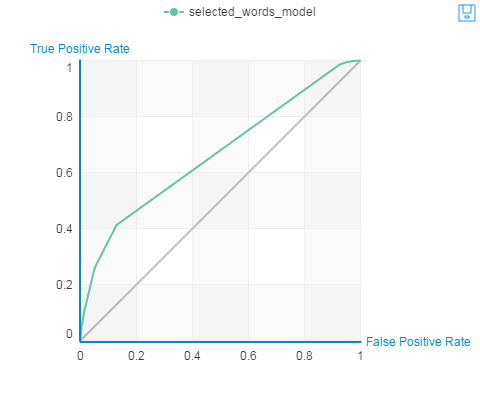

In [62]:
from IPython.display import Image
Image(filename='img2.png')

##Examine the Weights the Learned Classifier Assigned to Each of the 11 selected_words

In [49]:
selected_words_model['coefficients'].sort('value')

name,index,class,value
count_selected,terrible,1,-2.09049998487
count_selected,horrible,1,-1.99651800559
count_selected,awful,1,-1.76469955631
count_selected,hate,1,-1.40916406276
count_selected,bad,1,-0.985827369929
count_selected,wow,1,-0.0541450123332
count_selected,great,1,0.883937894898
count_selected,fantastic,1,0.891303090304
count_selected,amazing,1,0.892802422509
count_selected,awesome,1,1.05800888878


In [103]:
###sentiment_model['coefficients'].sort('value', ascending = False)###

#Comparing the accuracy of two sentiment analysis models

In [50]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.916256305548883, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  1461 |
 |      0       |        1        |  1328 |
 |      0       |        0        |  4000 |
 |      1       |        1        | 26515 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns]}

In [51]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8431419649291376, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  234  |
 |      1       |        0        |  130  |
 |      0       |        1        |  5094 |
 |      1       |        1        | 27846 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns]}

The majority class classifier (chance level) accuracy in this case is 0.5, as we can only predict that each review is either positive or negative. 

#Interpreting the Difference in Performance Between the Models

To understand why the model with all word counts performs better than the one with only the selected_words, I will now examine the reviews for a particular product named "Baby Trend Diaper Champ". 

In [52]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']

In [53]:
diaper_champ_reviews['predicted_sentiment'] = sentiment_model.predict(diaper_champ_reviews, output_type='probability')

In [54]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment', ascending=False)
sentiment_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.9999999372669541]

###The most positive review on "Baby Trend Diaper Champ", based on the first general model

In [55]:
diaper_champ_reviews['review'][0]

'Baby Luke can turn a clean diaper to a dirty diaper in 3 seconds flat. The diaper champ turns the smelly diaper into "what diaper smell" in less time than that. I hesitated and wondered what I REALLY needed for the nursery. This is one of the best purchases we made. The champ, the baby bjorn, fluerville diaper bag, and graco pack and play bassinet all vie for the best baby purchase.Great product, easy to use, economical, effective, absolutly fabulous.UpdateI knew that I loved the champ, and useing the diaper genie at a friend\'s house REALLY reinforced that!! There is no comparison, the chanp is easy and smell free, the genie was difficult to use one handed (which is absolutly vital if you have a little one on a changing pad) and there was a deffinite odor eminating from the genieplus we found that the quick tie garbage bags where the ties are integrated into the bag work really well because there isn\'t any added bulk around the sealing edge of the champ.'

###The most negative review on "Baby Trend Diaper Champ", based on the first general model

In [56]:
diaper_champ_reviews['review'][-1]

'My husband and I selected the Diaper "Champ" mainly because you can use ordinary trash bags and not be roped into buying the specialty refill bags, and it was moderately priced (a little less than the Diaper Dekor). It also seemed that the reviews of this product were generally more positive...The positives are:1. You can use any trash bag2. Easy to use and refillThe negatives are:1. The bag doesn\'t seal around the dirty diapers, so when it comes time to refill the bag, it\'s just like opening a regular trash can. Smells like the Champ is trying to knock YOU out with odor!2. The plastic seems to smell, ie. You put a dirty diaper in the hole, and flip the handle to dump the diaper into the champ. That "side" of the plastic dumper-thingie is in contact with the air inside the dirty diaper changer, so when you flip it over the next time to dispose of another diaper, you smell the last 8 diapers you put in there...pretty gross.3. The "odor seal" (some soft material) really seems to retai

In [57]:
diaper_champ_reviews['predicted_sentiment2'] = selected_words_model.predict(diaper_champ_reviews, output_type='probability')
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment2', ascending=False)
selected_words_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.9984234145936199]

###The most positive review on "Baby Trend Diaper Champ", based on the second model with selected words

In [58]:
diaper_champ_reviews['review'][0]

'I LOVE LOVE LOVE this product! It is SO much easier to use than the Diaper Genie, (you need a PHD in poopy to figure out how to use the darn thing!) and it even takes the same bags as my kitchen trash can, shich is super convenient, and cost efficient as I can buy them in bulk.The only reason for not rating it a 5 star was that I did have one small problem with it. The foam gasket in the barrell which keeps the poopy smell inside the unit ripped somehow, and it got VERY stinky. HOWEVER, I contacted the manufacturer though their website, and received an email back the same day stating that this was unusual, and that replacement gaskets were on their way to me. They arrived inside of a week and after replacing, it works great again! (They even sent me extras should it happen again)I HIGHLY reccomend this diaper pail over ANY competitors, you will not be sorry!'

###The most positive review on "Baby Trend Diaper Champ", based on the second model with selected words

In [59]:
diaper_champ_reviews['review'][-1]

"The Diaper Champ is TERRIBLE at keeping the smelly diapers from only smelling in the container.  Our baby's room was constantly stinky (due to the Diaper Champ, not the baby!), and we were having to empty the container almost daily.  What's the point of having a diaper disposal system if you can't dispose of diapers efficiently?  Please don't buy this product unless you enjoy smelling those dirty diapers.  The Diaper Champ just doesn't work."

So, the most positive review predicted by the first model does not contain many words from the selected_words array. This is why this review received a lower score when using the second prediction model, based on selected_words. However, the most positive review according to the second model has a repeatedly used 'love' words, which makes it easily interpretable for the second model.